In [1]:
import pandas as pd
import numpy as np
import mlxtend as mlx
import mlxtend.preprocessing as mlp
import mlxtend.frequent_patterns as FP
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\TICS-2021-1\MineriaDeDatos\Proyecto Final\carpetas-de-investigacion-pgj-cdmx.csv',na_values='NaN')
#ex1 = pd.read_csv(LOC,na_values='NaN')
data = data.drop(columns=['año_hechos','mes_hechos','categoria_delito',
                        'Geopoint','calle_hechos2','calle_hechos',
                        'colonia_hechos','mes_inicio','ao_inicio','fiscalía','agencia',
                        'unidad_investigacion',])
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data.fecha_inicio = pd.to_datetime(data.fecha_inicio)
data.rename(columns={'longitud':'lon','latitud':'lat'}, inplace=True)

## De

## Experimento 1
#### Atributos:
- Delito
- Alcaldía
- Horario
    - mañana: 4-12 horas
    - tarde: 12-20 horas
    - noche: 20-4 horas
- Tiempo en denunciar
    - dia: menos de 1 día
    - sem: de 1 dia a una semana
    - mes: de una semana a 1 mes
    - inf: más de un mes


In [6]:
class experimento1():
    def __init__(self,ex1):
        delitos = ex1.delito
        alcaldia = ex1.alcaldia_hechos
        hora_hechos = [ex1.fecha_hechos[i].hour for i in range(ex1.shape[0])]
        print('Hora hechos')
        hora_arr1 = []
        for hora in hora_hechos:
            if hora in range(4,12):
                hora_arr1.append('mañana')
            elif hora in range(12,20):
                hora_arr1.append('tarde')
            else:
                hora_arr1.append('noche')
        tiempo_denuncia = ex1.fecha_inicio - ex1.fecha_hechos 
        tiempo_denuncia_arr1 = []
        for diffe in tiempo_denuncia:
            dias = diffe.days
            if dias <= 1:
                tiempo_denuncia_arr1.append('dia')
            elif dias <= 7:
                tiempo_denuncia_arr1.append('sem')
            elif dias <= 30:
                tiempo_denuncia_arr1.append('mes')
            else:
                tiempo_denuncia_arr1.append('inf')
        print('Tiempo denuncia')
        experimento1 = pd.DataFrame(
                                        {'delitos': delitos,
                                        'alcaldia': alcaldia,
                                        'hora': hora_arr1,
                                        'tden':tiempo_denuncia_arr1
                                        })
        self.experimento1 = pd.get_dummies(experimento1, 
                        columns=experimento1.columns,
                        dtype = bool) 
        print('Dummies') 
        
    
    def patrones_umbral(self,u):
         perfilesFrec = FP.apriori(self.experimento1, min_support=u,use_colnames=True)
         return perfilesFrec

    def patrones_rango_umbral(self,l,u):
        return ('Todavía no sirve')
        X = [x/100 for x in range(l,u)]
        Y = []
        for x in X:
            perfilesFrec = FP.apriori(self.experimento1, min_support=x)#,use_colnames=True)
            #perfilesFrec["itemsets"] = perfilesFrec["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
            Y.append(perfilesFrec.shape[0])  
            print('Graficando ...')      
            plt.plot(X,Y)
            plt.xlabel('umbral')
            plt.ylabel('patrones')
            plt.show()                  


In [4]:
E1 = experimento1(data)

Hora hechos
Tiempo denuncia
Dummies


In [32]:
E1.patrones_umbral(.56)

,support,itemsets
0,0.590203,(tden_dia)


In [34]:
E1.patrones_umbral(.45)

,support,itemsets
0,0.483020,(hora_tarde)
1,0.590203,(tden_dia)


In [45]:
E1.patrones_umbral(.06)

,support,itemsets
0,0.063578,(delitos_ROBO A NEGOCIO SIN VIOLENCIA)
1,0.064552,(delitos_ROBO DE OBJETOS)
2,0.085943,(delitos_VIOLENCIA FAMILIAR)
3,0.064989,(alcaldia_ALVARO OBREGON)
4,0.087281,(alcaldia_BENITO JUAREZ)
5,0.067050,(alcaldia_COYOACAN)
6,0.162445,(alcaldia_CUAUHTEMOC)
7,0.099023,(alcaldia_GUSTAVO A MADERO)
8,0.148263,(alcaldia_IZTAPALAPA)
9,0.066374,(alcaldia_MIGUEL HIDALGO)


In [47]:
E1.patrones_umbral(.04)

,support,itemsets
0,0.046256,(delitos_AMENAZAS)
1,0.054932,(delitos_DENUNCIA DE HECHOS)
2,0.056065,(delitos_FRAUDE)
3,0.063578,(delitos_ROBO A NEGOCIO SIN VIOLENCIA)
4,0.064552,(delitos_ROBO DE OBJETOS)
5,0.085943,(delitos_VIOLENCIA FAMILIAR)
6,0.064989,(alcaldia_ALVARO OBREGON)
7,0.048753,(alcaldia_AZCAPOTZALCO)
8,0.087281,(alcaldia_BENITO JUAREZ)
9,0.067050,(alcaldia_COYOACAN)


In [50]:
association_rules(E1.patrones_umbral(.04), metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(delitos_ROBO A NEGOCIO SIN VIOLENCIA),(tden_dia),0.063578,0.590203,0.047832,0.752343,1.27472,0.010308,1.654697


In [5]:
association_rules(E1.patrones_umbral(.04), metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(delitos_ROBO A NEGOCIO SIN VIOLENCIA),(tden_dia),0.063578,0.590203,0.047832,0.752343,1.274720,0.010308,1.654697
1,(delitos_VIOLENCIA FAMILIAR),(tden_dia),0.085943,0.590203,0.050182,0.583900,0.989321,-0.000542,0.984853
2,(alcaldia_BENITO JUAREZ),(hora_tarde),0.087281,0.483020,0.044477,0.509582,1.054992,0.002318,1.054162
3,(alcaldia_BENITO JUAREZ),(tden_dia),0.087281,0.590203,0.048887,0.560107,0.949008,-0.002627,0.931584
4,(alcaldia_COYOACAN),(tden_dia),0.067050,0.590203,0.040165,0.599023,1.014944,0.000591,1.021996
5,(alcaldia_CUAUHTEMOC),(hora_tarde),0.162445,0.483020,0.086658,0.533460,1.104425,0.008194,1.108114
6,(alcaldia_CUAUHTEMOC),(tden_dia),0.162445,0.590203,0.088915,0.547356,0.927404,-0.006960,0.905342
7,(alcaldia_GUSTAVO A MADERO),(tden_dia),0.099023,0.590203,0.062381,0.629961,1.067364,0.003937,1.107444
8,(alcaldia_IZTAPALAPA),(tden_dia),0.148263,0.590203,0.092596,0.624535,1.058170,0.005090,1.091439
9,(hora_mañana),(tden_dia),0.281712,0.590203,0.168539,0.598265,1.013660,0.002271,1.020068


## Pruebas

In [6]:
data = pd.read_csv('D:\TICS-2021-1\MineriaDeDatos\Proyecto Final\muestra20000.csv',na_values='NaN')
data = data.drop(columns=['año_hechos','mes_hechos','categoria_delito',
                          'Geopoint','calle_hechos2','calle_hechos',
                          'colonia_hechos','mes_inicio','ao_inicio',
                          'Unnamed: 0','fiscalía','agencia',
                          'unidad_investigacion',])
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data.fecha_inicio = pd.to_datetime(data.fecha_inicio)
data.rename(columns={'longitud':'lon','latitud':'lat'}, inplace=True)

In [7]:
data

,fecha_hechos,delito,alcaldia_hechos,fecha_inicio,lon,lat
0,2016-01-05 17:00:00,LESIONES CULPOSAS,GUSTAVO A MADERO,2016-01-05 18:35:37,-99.103527,19.481076
1,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,NaN,NaN
2,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,IZTACALCO,2017-11-01 16:56:04,-99.106072,19.395398
3,2015-12-30 20:00:00,FRAUDE,IZTAPALAPA,2016-01-05 21:12:42,-99.055887,19.322458
4,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,IZTAPALAPA,2018-05-22 10:44:45,-99.042786,19.319141
...,...,...,...,...,...,...
19995,2016-10-08 23:00:00,ROBO DE ACCESORIOS DE AUTO,BENITO JUAREZ,2016-10-09 15:03:34,-99.163153,19.384475
19996,2016-09-30 15:00:00,VIOLENCIA FAMILIAR,TLALPAN,2016-09-30 19:33:58,-99.148813,19.200038
19997,2016-10-09 12:30:00,ROBO A CASA HABITACION SIN VIOLENCIA,BENITO JUAREZ,2016-10-09 15:30:39,-99.181562,19.380338
19998,2018-02-27 21:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,XOCHIMILCO,2018-03-06 19:46:29,-99.137889,19.280636


In [4]:
data.delito.unique().shape, data.alcaldia_hechos.unique().shape

((204,), (66,))

## Obteniendo los atributos:
- delito
- alcaldía
- tiempo
- tiempo en denunciar

In [8]:
delitos = data.delito
alcaldia = data.alcaldia_hechos

In [9]:
hora_hechos = [data.fecha_hechos[i].hour for i in range(data.shape[0])]
len(hora_hechos)

20000

### Categorizando las horas
#### Arreglo 1
- mañana: 4-12 horas
- tarde: 12-20 horas
- noche: 20-4 horas

In [10]:
hora_arr1 = []
for hora in hora_hechos:
    if hora in range(4,12):
        hora_arr1.append('mañana')
    elif hora in range(12,20):
        hora_arr1.append('tarde')
    else:
        hora_arr1.append('noche')
hora_arr1

['tarde',
 'tarde',
 'tarde',
 'noche',
 'tarde',
 'noche',
 'mañana',
 'noche',
 'tarde',
 'tarde',
 'mañana',
 'mañana',
 'tarde',
 'tarde',
 'noche',
 'noche',
 'noche',
 'tarde',
 'noche',
 'tarde',
 'tarde',
 'mañana',
 'mañana',
 'mañana',
 'mañana',
 'tarde',
 'mañana',
 'noche',
 'mañana',
 'mañana',
 'tarde',
 'tarde',
 'tarde',
 'mañana',
 'mañana',
 'noche',
 'mañana',
 'mañana',
 'tarde',
 'noche',
 'tarde',
 'mañana',
 'tarde',
 'mañana',
 'mañana',
 'noche',
 'noche',
 'noche',
 'noche',
 'tarde',
 'tarde',
 'mañana',
 'noche',
 'noche',
 'tarde',
 'noche',
 'tarde',
 'mañana',
 'tarde',
 'mañana',
 'noche',
 'tarde',
 'noche',
 'tarde',
 'tarde',
 'tarde',
 'tarde',
 'noche',
 'mañana',
 'mañana',
 'mañana',
 'noche',
 'noche',
 'tarde',
 'tarde',
 'tarde',
 'noche',
 'mañana',
 'tarde',
 'tarde',
 'noche',
 'mañana',
 'mañana',
 'tarde',
 'mañana',
 'noche',
 'tarde',
 'noche',
 'noche',
 'tarde',
 'tarde',
 'noche',
 'tarde',
 'tarde',
 'noche',
 'noche',
 'tarde',
 'n

In [11]:
tiempo_denuncia = data.fecha_inicio -data.fecha_hechos 

In [12]:
tiempo_denuncia

0         0 days 01:35:37
1         0 days 02:45:20
2         0 days 00:16:04
3         6 days 01:12:42
4         5 days 18:44:45
               ...       
19995     0 days 16:03:34
19996     0 days 04:33:58
19997     0 days 03:00:39
19998     6 days 22:16:29
19999   101 days 09:49:33
Length: 20000, dtype: timedelta64[ns]

In [13]:
tiempo_denuncia[0].days


0

### Categorizando las denuncias
#### Arreglo 1
- m1dia: menos de 1 día
- d-sem: de 1 dia a una semana
- sem-mes: de una semana a 1 mes
- mes-inf: más de un mes

In [14]:
tiempo_denuncia_arr1 = []
for diffe in tiempo_denuncia:
    dias = diffe.days
    if dias <= 1:
        tiempo_denuncia_arr1.append('m1dia')
    elif dias <= 7:
        tiempo_denuncia_arr1.append('d-sem')
    elif dias <= 30:
        tiempo_denuncia_arr1.append('sem-mes')
    else:
        tiempo_denuncia_arr1.append('mes-inf')
tiempo_denuncia_arr1

['m1dia',
 'm1dia',
 'm1dia',
 'd-sem',
 'd-sem',
 'm1dia',
 'm1dia',
 'd-sem',
 'm1dia',
 'mes-inf',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'd-sem',
 'm1dia',
 'sem-mes',
 'm1dia',
 'm1dia',
 'sem-mes',
 'd-sem',
 'm1dia',
 'mes-inf',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'd-sem',
 'm1dia',
 'sem-mes',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'd-sem',
 'd-sem',
 'm1dia',
 'm1dia',
 'd-sem',
 'm1dia',
 'sem-mes',
 'm1dia',
 'm1dia',
 'm1dia',
 'mes-inf',
 'm1dia',
 'm1dia',
 'sem-mes',
 'sem-mes',
 'm1dia',
 'mes-inf',
 'sem-mes',
 'm1dia',
 'm1dia',
 'mes-inf',
 'm1dia',
 'm1dia',
 'sem-mes',
 'mes-inf',
 'sem-mes',
 'm1dia',
 'd-sem',
 'd-sem',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'sem-mes',
 'm1dia',
 'd-sem',
 'd-sem',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'mes-inf',
 'sem-mes',
 'm1dia',
 'mes-inf',
 'm1dia',
 'mes-inf',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'm1dia',
 'd-sem',
 'm1dia',
 'sem-mes',
 'd-sem',
 'm1dia'

In [15]:
delitos.shape, alcaldia.shape, len(hora_arr1), len(tiempo_denuncia_arr1)

((20000,), (20000,), 20000, 20000)

In [16]:
pd.DataFrame(delitos)

,delito
0,LESIONES CULPOSAS
1,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...
2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
3,FRAUDE
4,ROBO A REPARTIDOR CON VIOLENCIA
...,...
19995,ROBO DE ACCESORIOS DE AUTO
19996,VIOLENCIA FAMILIAR
19997,ROBO A CASA HABITACION SIN VIOLENCIA
19998,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA


In [14]:
#pd.DataFrame([delitos,alcaldia,hora_arr1,tiempo_denuncia_arr1])

AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

In [18]:
experimento1 = pd.DataFrame(
    {'delitos': delitos,
     'alcaldia': alcaldia,
     'hr-arr1': hora_arr1,
     't-denuncia_arr1':tiempo_denuncia_arr1
    })
    #,
    # 'nada': [0 for i in range(len(delitos))]

In [19]:
experimento1

,delitos,alcaldia,hr-arr1,t-denuncia_arr1
0,LESIONES CULPOSAS,GUSTAVO A MADERO,tarde,m1dia
1,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,TLALNEPANTLA DE BAZ,tarde,m1dia
2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,IZTACALCO,tarde,m1dia
3,FRAUDE,IZTAPALAPA,noche,d-sem
4,ROBO A REPARTIDOR CON VIOLENCIA,IZTAPALAPA,tarde,d-sem
...,...,...,...,...
19995,ROBO DE ACCESORIOS DE AUTO,BENITO JUAREZ,noche,m1dia
19996,VIOLENCIA FAMILIAR,TLALPAN,tarde,m1dia
19997,ROBO A CASA HABITACION SIN VIOLENCIA,BENITO JUAREZ,tarde,m1dia
19998,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,XOCHIMILCO,noche,d-sem


In [20]:
experimento1 = pd.get_dummies(experimento1, 
                    columns=experimento1.columns,
                    dtype = bool)
experimento1.shape

(20000, 276)

In [21]:
'Combinaciones posibles de relaciones:', 2**276-1

('Combinaciones posibles de relaciones:',
 121416805764108066932466369176469931665150427440758720078238275608681517825325531135)

In [22]:
perfilesFrec = FP.apriori(experimento1, min_support=.05,use_colnames=True)
perfilesFrec["itemsets"] = perfilesFrec["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
print(perfilesFrec)
#for i in range(perfilesFrec.shape[0]):
    #r = perfilesFrec.iloc[i,1].apply(lambda x: list(x)[0]).astype("unicode")
    #perfilesFrec["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    #####perfilesFrec[i]["itemsets"] = perfilesFrec[i]["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    #####print(perfilesFrec[i]["itemsets"])
    #print(perfilesFrec.iloc[i,0], perfilesFrec.iloc[i,1])#.apply(lambda x: list(x)[0]).astype("unicode"))
    #rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")

    support                                           itemsets
0   0.06210                         delitos_DENUNCIA DE HECHOS
1   0.05830                                     delitos_FRAUDE
2   0.06270               delitos_ROBO A NEGOCIO SIN VIOLENCIA
3   0.06565                            delitos_ROBO DE OBJETOS
4   0.08825                         delitos_VIOLENCIA FAMILIAR
5   0.06245                            alcaldia_ALVARO OBREGON
6   0.05090                              alcaldia_AZCAPOTZALCO
7   0.08720                             alcaldia_BENITO JUAREZ
8   0.07090                                  alcaldia_COYOACAN
9   0.16125                                alcaldia_CUAUHTEMOC
10  0.09720                          alcaldia_GUSTAVO A MADERO
11  0.14900                                alcaldia_IZTAPALAPA
12  0.06675                            alcaldia_MIGUEL HIDALGO
13  0.05890                                   alcaldia_TLALPAN
14  0.05765                       alcaldia_VENUSTIANO C

In [25]:
X = [x/100 for x in range(5,101)]
Y = []

for x in X:
    perfilesFrec = FP.apriori(experimento1, min_support=x)#,use_colnames=True)
    Y.append(perfilesFrec.shape[0])

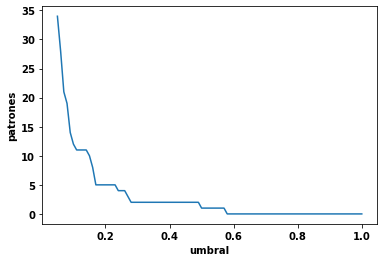

In [26]:
plt.plot(X,Y)
plt.xlabel('umbral')
plt.ylabel('patrones')
plt.show()